# Cloning the **damavand** repository

In [1]:
!git clone https://github.com/amirberenji1995/damavand

Cloning into 'damavand'...
remote: Enumerating objects: 263, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 263 (delta 132), reused 196 (delta 65), pack-reused 0 (from 0)
Receiving objects: 100% (263/263), 6.62 MiB | 14.71 MiB/s, done.
Resolving deltas: 100% (132/132), done.


In [2]:
!pip install -r damavand/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully 

# Importings

In [1]:
from damavand.damavand.datasets.downloaders import read_addresses, CwruDownloader
from damavand.damavand.datasets.digestors import CWRU
from damavand.damavand.signal_processing.transformations import *
from damavand.damavand.signal_processing.feature_extraction import *
from damavand.damavand.utils import *
import pandas as pd
import numpy as np
import scipy

# Instantiating a downloader object

In [2]:
addresses = read_addresses()
downloader = CwruDownloader(addresses['CWRU'])
downloader.download('CWRU/')
while len(list(downloader.undownloaded.keys())) > 0:
  downloader.redownload()
  print(downloader.undownloaded)

Downloading: normal_1797_12K.mat
Downloaded: normal_1797_12K.mat
Downloading: normal_1772_12K.mat
Downloaded: normal_1772_12K.mat
Downloading: normal_1750_12K.mat
Downloaded: normal_1750_12K.mat
Downloading: normal_1730_12K.mat
Downloaded: normal_1730_12K.mat
Downloading: DE_IR_007_1797_12K.mat
Downloaded: DE_IR_007_1797_12K.mat
Downloading: DE_IR_007_1772_12K.mat
Downloaded: DE_IR_007_1772_12K.mat
Downloading: DE_IR_007_1750_12K.mat
Downloaded: DE_IR_007_1750_12K.mat
Downloading: DE_IR_007_1730_12K.mat
Downloaded: DE_IR_007_1730_12K.mat
Downloading: DE_IR_014_1797_12K.mat
Downloaded: DE_IR_014_1797_12K.mat
Downloading: DE_IR_014_1772_12K.mat
Downloaded: DE_IR_014_1772_12K.mat
Downloading: DE_IR_014_1750_12K.mat
Downloaded: DE_IR_014_1750_12K.mat
Downloading: DE_IR_014_1730_12K.mat
Downloaded: DE_IR_014_1730_12K.mat
Downloading: DE_IR_021_1797_12K.mat
Downloaded: DE_IR_021_1797_12K.mat
Downloading: DE_IR_021_1772_12K.mat
Downloaded: DE_IR_021_1772_12K.mat
Downloading: DE_IR_021_1750_12

# Instantiating a digestor object

In [3]:
mining_params = {
    '12K': {'win_len': 12000, 'hop_len': 3000},
    '48K': {'win_len': 48000, 'hop_len': 16000},
}

cwru = CWRU('CWRU/')
cwru.mine(mining_params, synchronous_only = True)

In [4]:
cwru.data.keys()

dict_keys(['FE', 'DE'])

In [5]:
cwru.data['FE'].keys()

dict_keys(['12K', '48K'])

In [6]:
print(len(cwru.data['FE']['12K']), ' - ', len(cwru.data['FE']['48K']), '\n',
      len(cwru.data['DE']['12K']), ' - ', len(cwru.data['DE']['48K']))

101  -  52 
 101  -  52


# Aggregating Drive-End data recorded at 12 kHz

In [7]:
df = pd.concat(cwru.data['DE']['12K']).reset_index(drop = True)
df

,0,1,2,3,4,5,6,7,8,9,...,11995,11996,11997,11998,11999,state,defected_bearing,severity,rot_speed,fs
0,1.189431,-0.177866,-0.774816,0.501518,0.993697,-0.348017,-0.811363,0.424362,0.988012,0.089339,...,-0.520605,-0.530757,0.244465,0.147410,-0.780907,IR,DE,021,1797,12K
1,-0.068629,0.294414,0.136852,-0.341114,-0.238780,0.232282,0.006903,-0.444260,0.123857,0.719994,...,-0.023147,-0.305784,-0.127512,0.177866,0.084466,IR,DE,021,1797,12K
2,0.770755,-0.434920,-0.674918,0.679791,1.179685,-0.180303,-0.758978,0.390656,0.934408,-0.152283,...,0.437763,-0.450351,-0.537254,0.128730,-0.076751,IR,DE,021,1797,12K
3,0.034517,-0.164466,0.175024,0.291977,-0.102740,-0.330555,-0.026802,0.242841,-0.049137,-0.370758,...,0.015431,-0.360606,-0.196140,0.165684,-0.100710,IR,DE,021,1797,12K
4,-0.418677,0.707811,0.378068,-0.569741,-0.200201,1.194710,0.927911,-0.470250,-0.257866,0.823140,...,0.858064,0.634309,-0.640400,-0.449133,0.775628,IR,DE,021,1797,12K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,-0.022532,-0.014940,0.090820,0.108805,-0.032479,-0.060330,0.016889,0.028866,-0.029800,-0.066176,...,0.065242,0.048231,0.085988,0.052819,0.029312,OR@3,FE,007,1797,12K
4137,0.008851,-0.059640,-0.084851,0.049368,0.038650,-0.020178,0.076204,0.141162,0.019650,-0.014940,...,-0.003694,0.164182,-0.046567,-0.244283,0.038082,OR@3,FE,007,1797,12K
4138,0.006171,-0.011571,-0.031667,0.037960,0.053550,-0.010596,-0.019893,0.131581,0.111850,-0.109048,...,-0.041208,0.034225,0.133489,0.028176,-0.085339,OR@3,FE,007,1797,12K
4139,0.004385,-0.025983,0.018066,0.015752,-0.043197,-0.122730,-0.086881,-0.064146,-0.095691,-0.063537,...,-0.210627,0.015022,0.143436,0.007633,-0.112824,OR@3,FE,007,1797,12K


# Signals-Metadata declaration

In [8]:
signals, metadata = df.iloc[:, : -5], df.iloc[:, -5 :]
signals

,0,1,2,3,4,5,6,7,8,9,...,11990,11991,11992,11993,11994,11995,11996,11997,11998,11999
0,1.189431,-0.177866,-0.774816,0.501518,0.993697,-0.348017,-0.811363,0.424362,0.988012,0.089339,...,0.673294,-0.183552,-0.681415,0.108425,0.295632,-0.520605,-0.530757,0.244465,0.147410,-0.780907
1,-0.068629,0.294414,0.136852,-0.341114,-0.238780,0.232282,0.006903,-0.444260,0.123857,0.719994,...,0.040609,0.207105,-0.270048,-0.426392,-0.032081,-0.023147,-0.305784,-0.127512,0.177866,0.084466
2,0.770755,-0.434920,-0.674918,0.679791,1.179685,-0.180303,-0.758978,0.390656,0.934408,-0.152283,...,0.262333,0.704968,-0.175836,-0.538879,0.260708,0.437763,-0.450351,-0.537254,0.128730,-0.076751
3,0.034517,-0.164466,0.175024,0.291977,-0.102740,-0.330555,-0.026802,0.242841,-0.049137,-0.370758,...,0.046294,0.249744,-0.306190,-0.383347,0.082030,0.015431,-0.360606,-0.196140,0.165684,-0.100710
4,-0.418677,0.707811,0.378068,-0.569741,-0.200201,1.194710,0.927911,-0.470250,-0.257866,0.823140,...,0.104771,0.671669,0.063756,-0.820297,-0.407306,0.858064,0.634309,-0.640400,-0.449133,0.775628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,-0.022532,-0.014940,0.090820,0.108805,-0.032479,-0.060330,0.016889,0.028866,-0.029800,-0.066176,...,0.007633,-0.045186,0.006496,0.002111,0.030246,0.065242,0.048231,0.085988,0.052819,0.029312
4137,0.008851,-0.059640,-0.084851,0.049368,0.038650,-0.020178,0.076204,0.141162,0.019650,-0.014940,...,-0.068815,-0.074702,0.162720,0.086638,-0.153098,-0.003694,0.164182,-0.046567,-0.244283,0.038082
4138,0.006171,-0.011571,-0.031667,0.037960,0.053550,-0.010596,-0.019893,0.131581,0.111850,-0.109048,...,-0.081076,-0.023750,-0.060452,-0.018310,0.035240,-0.041208,0.034225,0.133489,0.028176,-0.085339
4139,0.004385,-0.025983,0.018066,0.015752,-0.043197,-0.122730,-0.086881,-0.064146,-0.095691,-0.063537,...,0.072347,-0.177092,-0.102553,0.174291,0.009825,-0.210627,0.015022,0.143436,0.007633,-0.112824


In [9]:
metadata

,state,defected_bearing,severity,rot_speed,fs
0,IR,DE,021,1797,12K
1,IR,DE,021,1797,12K
2,IR,DE,021,1797,12K
3,IR,DE,021,1797,12K
4,IR,DE,021,1797,12K
...,...,...,...,...,...
4136,OR@3,FE,007,1797,12K
4137,OR@3,FE,007,1797,12K
4138,OR@3,FE,007,1797,12K
4139,OR@3,FE,007,1797,12K


In [10]:
metadata['comb'] = metadata['state'] + '_' + metadata['defected_bearing'] + '_' + metadata['severity'] + '_' + metadata['rot_speed']
metadata['comb'].value_counts()

,count
comb,
normal_-_-_1750,158
normal_-_-_1730,158
normal_-_-_1772,158
normal_-_-_1797,78
IR_DE_021_1797,37
...,...
Ball_FE_021_1730,37
IR_DE_014_1750,37
OR@6_DE_021_1772,37


# Signal Processing

## Envelope Extraction

In [11]:
signals_env = env(signals)
signals_env.shape

(4141, 12000)

## FFT

In [12]:
window = scipy.signal.windows.hann(signals_env.shape[1])
freq_filter = scipy.signal.butter(25, [5, 5500], 'bandpass', fs = 12000, output='sos')

In [13]:
signals_env_fft = fft(signals_env, freq_filter = freq_filter, window = window)
signals_env_fft.shape

(4141, 6000)

## Zoomed FFT

In [14]:
signals_env_ZoomedFFT = zoomed_fft(signals_env, 0, 1000, 2000, 12000, freq_filter = freq_filter, window = window)
signals_env_ZoomedFFT.shape

(4141, 2000)

## STFT

In [15]:
STFT_window = scipy.signal.windows.hann(1024)
STFT_freq_filter = scipy.signal.butter(25, [5, 5500], 'bandpass', fs = 12000, output='sos')
signals_env_STFT = stft(signals_env, 1024, 200, STFT_freq_filter, STFT_window)
signals_env_STFT.shape

(4141, 55, 512)

## Statistical Features

In [16]:
# Defining the feature-set to be extracted
features = {'mean': (np.mean, (), {}), 'var': (np.var, (), {}), 'rms': (rms, (), {})}

In [17]:
features_df = feature_extractor(signals, features)
features_df

,mean,var,rms
0,0.019769,0.267842,0.517912
1,0.019584,0.261590,0.511833
2,0.019419,0.260970,0.511221
3,0.019047,0.258746,0.509027
4,0.018798,0.254876,0.505202
...,...,...,...
4136,0.002500,0.007554,0.086951
4137,0.002516,0.007271,0.085306
4138,0.002493,0.007095,0.084266
4139,0.002426,0.007193,0.084844


# Visualization

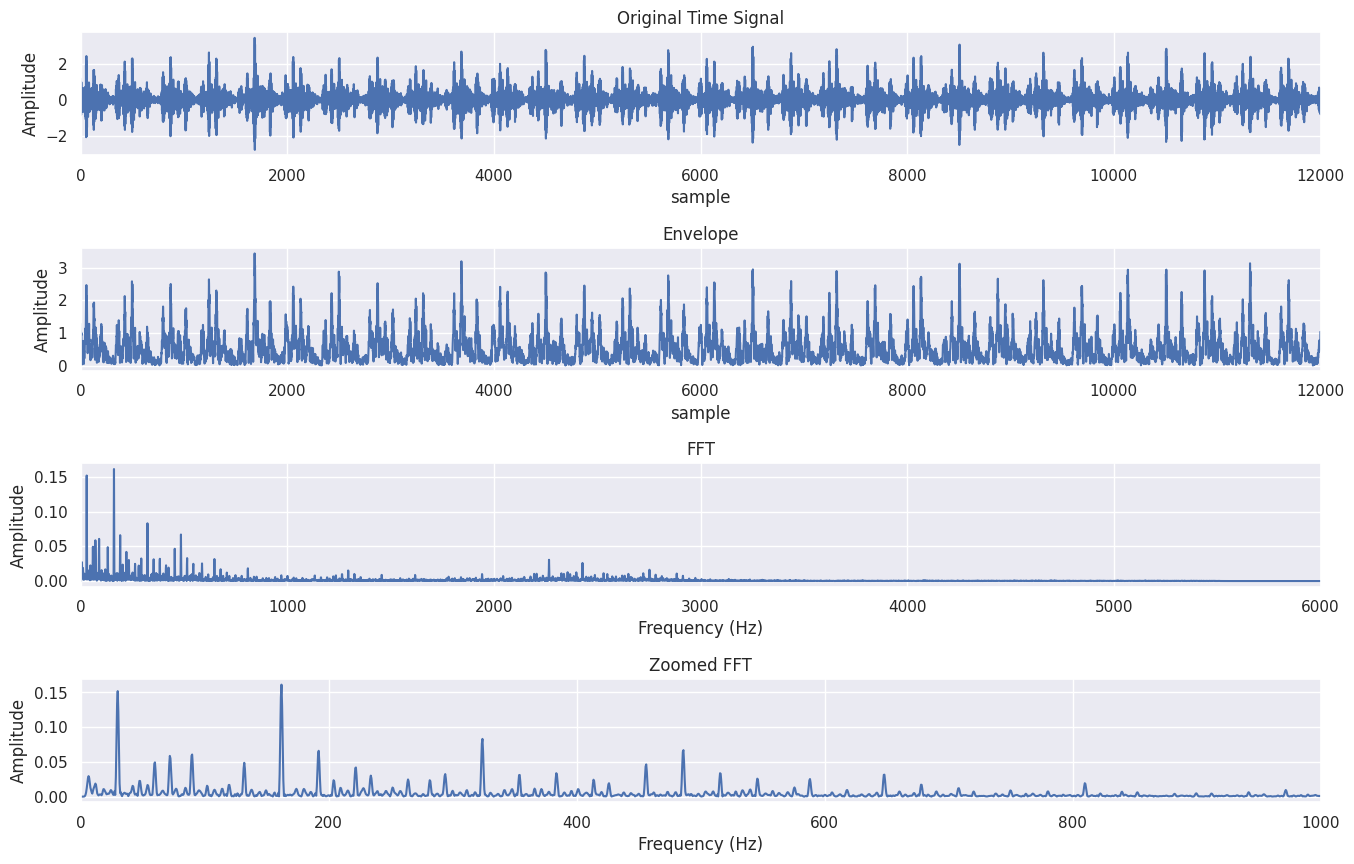

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

fig, axes = plt.subplots(4, 1, figsize = (16, 10))

sns.lineplot(ax=axes[0], x=range(len(signals.iloc[0,:])), y = signals.iloc[0,:])
axes[0].set_title("Original Time Signal")
axes[0].set_ylabel("Amplitude")
axes[0].set_xlabel("sample")
axes[0].set_xlim(0, 12000)

sns.lineplot(ax=axes[1], x=range(len(signals_env.iloc[0,:])), y = signals_env.iloc[0, :])
axes[1].set_title("Envelope")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlabel("sample")
axes[1].set_xlim(0, 12000)


sns.lineplot(ax=axes[2], x = fft_freq_axis(12000, 12000), y = signals_env_fft.iloc[0, :])
axes[2].set_title("FFT")
axes[2].set_ylabel("Amplitude")
axes[2].set_xlabel("Frequency (Hz)")
axes[2].set_xlim(0, 6000)


sns.lineplot(ax=axes[3], x = zoomed_fft_freq_axis(0, 1000, 2000), y = signals_env_ZoomedFFT.iloc[0, :])
axes[3].set_title("Zoomed FFT")
axes[3].set_ylabel("Amplitude")
axes[3].set_xlabel("Frequency (Hz)")
axes[3].set_xlim(0, 1000)


plt.subplots_adjust(hspace = 0.75)
fig.show()

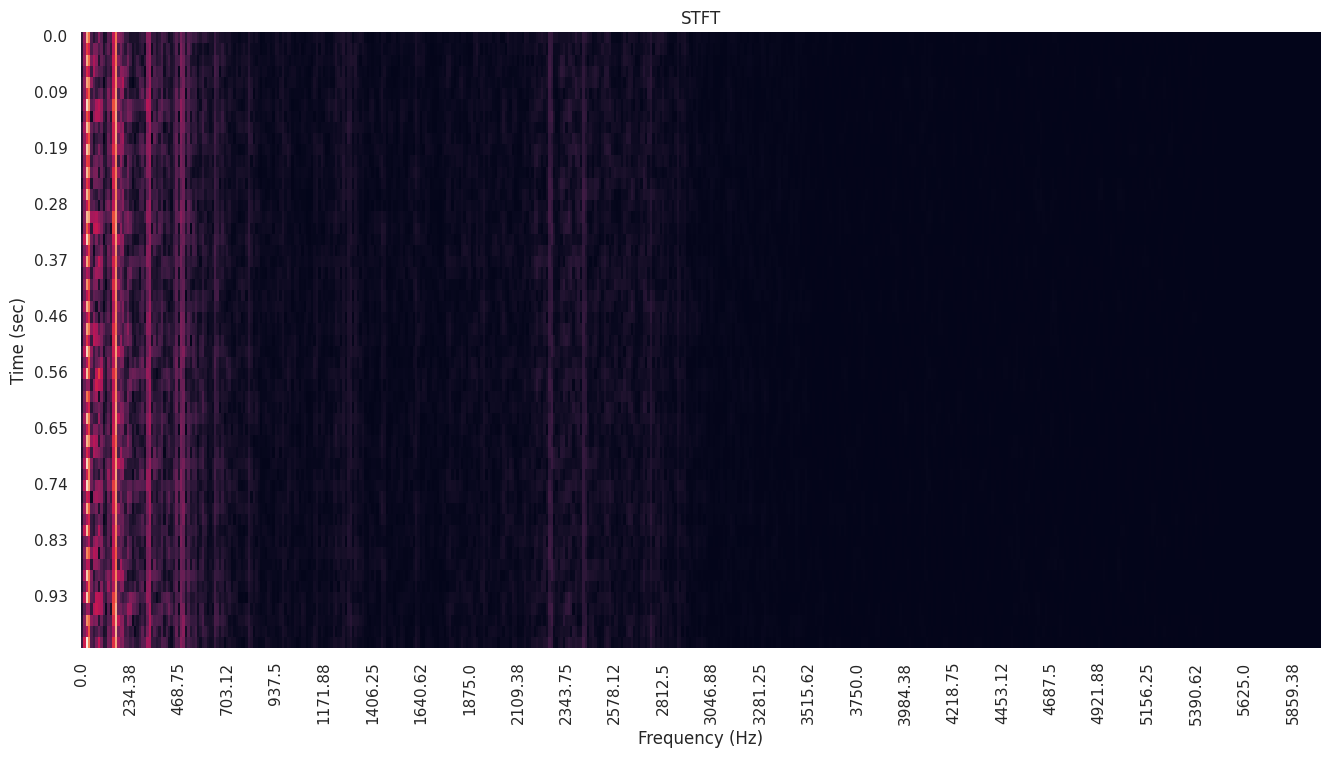

In [19]:
t = np.linspace(0, 1, 55)
f = fft_freq_axis(1024, 12000)

fig, ax = plt.subplots(figsize = (16, 8))

ax = sns.heatmap(signals_env_STFT[0, :, :], xticklabels = np.round(f, decimals = 2), yticklabels = np.round(t, decimals = 2), annot = False, cbar = False)
ax.set(xlabel = 'Frequency (Hz)', ylabel = 'Time (sec)')
ax.set_title('STFT')
ax.set_xticks(ax.get_xticks()[::20])
ax.set_yticks(ax.get_yticks()[::5])


fig.show()